##Reading Enrollment Files##

In [35]:
import unicodecsv as ucsv

enrollmentpath = r'C:\Users\Upend\Anaconda3\MyScripts\enrollments.csv'
engagementpath = r'C:\Users\Upend\Anaconda3\MyScripts\daily_engagement.csv'
submissionpath = r'C:\Users\Upend\Anaconda3\MyScripts\project_submissions.csv'

with open(enrollmentpath,'rb') as f:
    reader = ucsv.DictReader(f)
    enrollment = list(reader)
print(enrollment[0])

with open(engagementpath,'rb') as f:
    reader = ucsv.DictReader(f)
    daily_engagement = list(reader)
    
print(daily_engagement[0])

with open(submissionpath,'rb') as f:
    reader = ucsv.DictReader(f)
    project_submissions = list(reader)
print(project_submissions[0])

enrollmentdict = dict(enrollment[0])
print(enrollmentdict)
print(enrollmentdict.keys())
print(enrollmentdict.values())

daily_engagement_dict = daily_engagement[0]
print(daily_engagement_dict)
print(daily_engagement_dict.keys())
print(daily_engagement_dict.values())

project_submission_dict = project_submissions[0]
print(project_submission_dict)
print(project_submission_dict.keys())
print(project_submission_dict.values())

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])
{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}
dict_keys(['account_key', 'status', 'join_date', 'cancel_date', 'days_to_cancel', 'is_udacity', 'is_canceled'])
dict_values(['448', 'canceled', '2014-11-10', '2015-01-14', '65', 'True', 'True'])
OrderedDict([('acct', '0'), ('utc_date', '2

## Function to read the files##

In [34]:
import unicodecsv as ucsv
from datetime import datetime as dt

enrollmentpath = r'C:\Users\Upend\Anaconda3\MyScripts\enrollments.csv'
engagementpath = r'C:\Users\Upend\Anaconda3\MyScripts\daily_engagement.csv'
submissionpath = r'C:\Users\Upend\Anaconda3\MyScripts\project_submissions.csv'

def read_files(filepath):
    with open(filepath,'rb') as f:
        reader = ucsv.DictReader(f)
        return list(reader)

enrollments = read_files(enrollmentpath)
daily_engagements = read_files(engagementpath)
project_submissions = read_files(submissionpath)

def parse_int(intfield):
    if intfield == '':
        return None
    else:
        return int(intfield)

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')

def parse_float(floatfield):
    if floatfield == '':
        return None
    else:
        return float(floatfield)

print(enrollments[0])
    
for enrollment in enrollments:
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_int(enrollment['days_to_cancel'])
    enrollment['is_udacity'] = (enrollment['is_udacity'] == 'True')
    enrollment['is_canceled'] = (enrollment['is_canceled'] == 'True')

print(enrollments[0])    

print(daily_engagements[0])

for daily_engagement in daily_engagements:
    daily_engagement['utc_date'] = parse_date(daily_engagement['utc_date'])
    daily_engagement['num_courses_visited'] = parse_int(parse_float(daily_engagement['num_courses_visited']))
    daily_engagement['total_minutes_visited'] = parse_float(daily_engagement['total_minutes_visited'])
    daily_engagement['lessons_completed'] = parse_int(parse_float(daily_engagement['lessons_completed']))
    daily_engagement['projects_completed'] = parse_int(parse_float(daily_engagement['projects_completed']))

print(daily_engagements[0])    
    
print(project_submissions[0])

for project_submission in project_submissions:
    project_submission['creation_date'] = parse_date(project_submission['creation_date'])
    project_submission['completion_date'] = parse_date(project_submission['completion_date'])

print(project_submissions[0])


OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('acct', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0)])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('pr

In [25]:
from datetime import datetime as dt
datestring = '2018-11-11'

dateformat = dt.strptime(datestring, '%Y-%m-%d')
print(dateformat)


2018-11-11 00:00:00


##Modifing the acct header to account_key in daily engagements ##

In [38]:
for daily_engagement in daily_engagements:
    daily_engagement['account_key'] = daily_engagement['acct']
    del(daily_engagement['acct'])

print(daily_engagements[0])

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])


## finding unique account in each file##

In [54]:
def unique_accounts(enrollmentdata):
    enrollmentset = set()
    for enrollmentelement in enrollmentdata:
        enrollmentset.add(enrollmentelement['account_key'])
    return enrollmentset

print(len(enrollments))
unique_enrollment = unique_accounts(enrollments)
print(len(unique_enrollment))
print(len(daily_engagements))
unique_daily_engagements = unique_accounts(daily_engagements)
print(len(unique_daily_engagements))
print(len(project_submissions))
unique_project_submissions = unique_accounts(project_submissions)
print(len(unique_project_submissions))

1640
1302
136240
1237
3642
743


## disturbance between the enrollments and daily_engagements

In [73]:
count = 0
for enrollmentele in unique_enrollment:
    if enrollmentele not in unique_daily_engagements:
        print(enrollmentele)   
        for enrollment in enrollments:
            if enrollment['account_key'] == enrollmentele:
                if(enrollment['join_date'] != enrollment['cancel_date'] and enrollment['days_to_cancel'] != 0):
                    print(enrollment)
                    count += 1
                    
                    
print("abnormal records: ", count)
    # print(enrollments['account_key']=enrollmentele)
        

1129
1155
711
654
875
1069
997
789
1284
1171
1191
914
1101
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
802
799
926
707
902
884
870
717
1145
1044
1218
1222
749
1238
1025
733
1291
1086
1120
1219
727
803
819
878
1010
737
728
1213
1125
889
725
1304
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
1273
1190
766
1241
1237
981
968
1186
1063
1270
871
739
817
664
996
841
750
964
1148
1079
abnormal records:  3

## remove these data points from the Test data##

In [85]:
udacity_test_account = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_account.add(enrollment['account_key'])

print(udacity_test_account)

def remove_udacity_test_account(data):
    non_udacity_data = []
    for element in data:
        if element['account_key'] not in udacity_test_account:
            non_udacity_data.append(element)
    return non_udacity_data

non_udacity_enrollments = remove_udacity_test_account(enrollments)
non_udacity_daily_engagements = remove_udacity_test_account(daily_engagements)
non_udacity_project_submissions = remove_udacity_test_account(project_submissions)
print(len(non_udacity_enrollments))
print(len(non_udacity_daily_engagements))
print(len(non_udacity_project_submissions))

{'818', '1304', '1101', '448', '312', '1069'}
1622
135656
3634


## Paid Students##

In [99]:
print(non_udacity_enrollments[0])
count = 0
overwrite_counter = 0
paid_students = dict()

print(len(non_udacity_enrollments))
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        if enrollment['account_key'] in paid_students:
            if enrollment['join_date'] > paid_students[enrollment['account_key']]:
                paid_students[enrollment['account_key']] = enrollment['join_date']
                overwrite_counter += 1
        else:
            paid_students[enrollment['account_key']] = enrollment['join_date'] 
        count += 1
print(count)
print(overwrite_counter)
print(len(paid_students))

OrderedDict([('account_key', '700'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 16, 0, 0)), ('days_to_cancel', 6), ('is_udacity', False), ('is_canceled', True)])
1622
1215
151
995


## Paid Students who engaged with in the first one week##

In [149]:
def with_in_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

def remove_free_trail(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trail(non_udacity_enrollments)
paid_engagements = remove_free_trail(non_udacity_daily_engagements)
paid_submissions = remove_free_trail(non_udacity_project_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))



1293
134549
3618
OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.2848873333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 33.4892696667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 13, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 64.7796776667), ('lesson

In [184]:
for engagement_record in paid_engagements:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [185]:
paid_engagement_in_first_week = []
for paid_engagement in paid_engagements:
    if with_in_week(paid_students[paid_engagement['account_key']],paid_engagement['utc_date']):
    
    #if non_udacity_daily_engagements_element['account_key'] in paid_students:
     
        #if (paid_students[non_udacity_daily_engagements_element['account_key']] - non_udacity_daily_engagements_element['utc_date']).days < 7:
            paid_engagement_in_first_week.append(paid_engagement)
print(paid_engagement_in_first_week[0])
print(paid_engagement_in_first_week[1])
print(paid_engagement_in_first_week[2])
print(paid_engagement_in_first_week[3])
print(paid_engagement_in_first_week[4])
print(len(paid_engagement_in_first_week))

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.2848873333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 33.4892696667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 13, 0, 0)), ('num_courses_v

## average time spent accross the course ##

#didnt work - need to look at it later#
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    print(account_key)
    engagement_by_account[account_key].append(engagement_record)
    
total_minute_per_account = []

for account_key, engagement_by_account_record in engagement_by_account.items():
    total_min = 0
    for engagement_record in engagement_by_account_record:
        total_min += engagement_record['total_minutes_visited']
    total_minute_per_account[account_key] = total_min

total_minutes = total_minute_per_account.values()

import numpy as np
np.mean(total_minutes)
    

In [186]:
# Import library
from collections import defaultdict

# Creates a dictionary of engagement grouped by student
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

    
# Creates a dictionary with the total minutes each student spent in the classroom during the first week
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

#Import library
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = np.array(list(total_minutes_by_account.values()))
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## looking for issue with data with maximum minutes ##

In [187]:
Student_with_max_minutes = None
max_minute = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minute:
        max_minute = total_minutes
        Student_with_max_minutes = student
        
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == Student_with_max_minutes:
        print(engagement_record)

## My code##
'''counter = 0
print(len(total_minutes_by_account.keys()))

for engagement_key in engagement_by_account.keys():
    if total_minutes_by_account[engagement_key] > 3000:
        counter += 1
        print('account_key: "  {}  " total minutes: "  {}"' .format(engagement_key,str(total_minutes_by_account[engagement_key])  ))
        print(engagement_by_account[engagement_key])
        
print(counter)'''

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_c

'counter = 0\nprint(len(total_minutes_by_account.keys()))\n\nfor engagement_key in engagement_by_account.keys():\n    if total_minutes_by_account[engagement_key] > 3000:\n        counter += 1\n        print(\'account_key: "  {}  " total minutes: "  {}"\' .format(engagement_key,str(total_minutes_by_account[engagement_key])  ))\n        print(engagement_by_account[engagement_key])\n        \nprint(counter)'

## Lessions completed by students ##

In [188]:
lession_in_first_week = {}


for account_keys, engagement_records in engagement_by_account.items():
    lession_counter = 0
    for engagement in engagement_records:
        lession_counter += engagement['lessons_completed']
        lession_in_first_week[account_keys] = lession_counter

print(len(lession_in_first_week))

lession = np.array(list(lession_in_first_week.values()))
print("Mean : ", np.mean(lession))
print("standard dev: ", np.std(lession))
print("Max: ", np.max(lession))
print("Min: ", np.min(lession))

995
Mean :  1.636180904522613
standard dev:  3.002561299829423
Max:  36
Min:  0


## creating seperate methods for above logics##

In [189]:
from collections import defaultdict

def group_data(data,key_format):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_format]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data,field):
    sum_data = {}
    for key,data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field]
            sum_data[key] = total
    return sum_data

import numpy as np

def descriptions(data):
    print("Mean : ", np.mean(data))
    print("standard dev: ", np.std(data))
    print("Max: ", np.max(data))
    print("Min: ", np.min(data))        

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')
total_minutes = list(total_minutes_by_account.values())
descriptions(total_minutes)

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
total_lessons_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
total_lessons = list(total_lessons_by_account.values())
descriptions(total_lessons)

Mean :  306.70832675342825
standard dev:  412.99693340852957
Max:  3564.7332644989997
Min:  0.0
Mean :  1.636180904522613
standard dev:  3.002561299829423
Max:  36
Min:  0


## number of class visited ##

In [191]:
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
total_classes_by_account = sum_grouped_items(engagement_by_account,'has_visited')
total_classes = list(total_classes_by_account.values())
descriptions(total_classes)

Mean :  2.8673366834170855
standard dev:  2.2551980029196814
Max:  7
Min:  0


## passed and failed students ##

In [210]:
subway_project_lesson_keys =['746169184','3176718735']
pass_status = ['PASSED','DISTINCTION']
project_passing = set()
passing_engagement = []
non_passing_engagement = []

for account in paid_submissions:
    if account['assigned_rating'] in pass_status and account['lesson_key'] in subway_project_lesson_keys:
        project_passing.add(account['account_key'])

print(len(project_passing))
    
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in project_passing:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

647
4527
2392


## stats on the passed and non_passed students ##

In [215]:
pass_engagement_by_account = group_data(passing_engagement,'account_key')

non_pass_engagement_by_account = group_data(non_passing_engagement,'account_key')

print("Non Pass Stats by visits")

total_non_pass_days_by_account = sum_grouped_items(non_pass_engagement_by_account,'has_visited')
total_non_pass_days = list(total_non_pass_days_by_account.values())
descriptions(total_non_pass_days)

print("Pass Stats by visits")

total_pass_days_by_account = sum_grouped_items(pass_engagement_by_account,'has_visited')
total_pass_days = list(total_pass_days_by_account.values())
descriptions(total_pass_days)

print("Non Pass Stats by lessons_completed")

total_non_pass_lesson_by_account = sum_grouped_items(non_pass_engagement_by_account,'lessons_completed')
total_non_pass_lesson = list(total_non_pass_lesson_by_account.values())
descriptions(total_non_pass_lesson)

print("Pass Stats by lessons_completed")

total_pass_lesson_by_account = sum_grouped_items(pass_engagement_by_account,'lessons_completed')
total_pass_lesson = list(total_pass_lesson_by_account.values())
descriptions(total_pass_lesson)

print("Non Pass Stats by total minutes")

total_non_pass_min_by_account = sum_grouped_items(non_pass_engagement_by_account,'total_minutes_visited')
total_non_pass_min = list(total_non_pass_min_by_account.values())
descriptions(total_non_pass_min)

print("Pass Stats by total minutes")

total_pass_min_by_account = sum_grouped_items(pass_engagement_by_account,'total_minutes_visited')
total_pass_min = list(total_pass_min_by_account.values())
descriptions(total_pass_min)


Non Pass Stats by visits
Mean :  1.9051724137931034
standard dev:  1.9057314413619046
Max:  7
Min:  0
Pass Stats by visits
Mean :  3.384853168469861
standard dev:  2.2588214709184595
Max:  7
Min:  0
Non Pass Stats by lessons_completed
Mean :  0.8620689655172413
standard dev:  2.5491599418312028
Max:  27
Min:  0
Pass Stats by lessons_completed
Mean :  2.052550231839258
standard dev:  3.1422270555779344
Max:  36
Min:  0
Non Pass Stats by total minutes
Mean :  143.32647426675584
standard dev:  269.5386190114951
Max:  1768.5227493319999
Min:  0.0
Pass Stats by total minutes
Mean :  394.58604648350865
standard dev:  448.4995193265521
Max:  3564.7332644989997
Min:  0.0


## created Halogram for these details ##

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt


Text(0.5,1,'Title of plt')

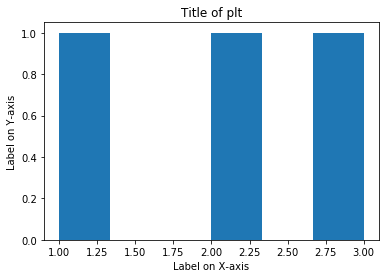

In [236]:
#import seaborn as sns
data = [1,2,3]
plt.hist(data,bins=6)

plt.xlabel("Label on X-axis")
plt.ylabel("Label on Y-axis")
plt.title("Title of plt")

(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

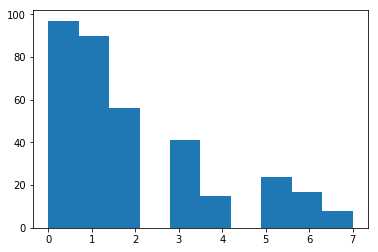

In [221]:
plt.hist(total_non_pass_days)

(array([87., 82., 79.,  0., 91., 77.,  0., 85., 78., 68.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

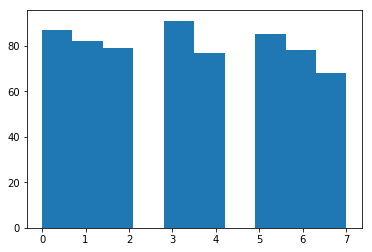

In [220]:
plt.hist(total_pass_days)

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

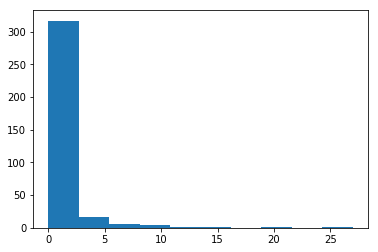

In [222]:
plt.hist(total_non_pass_lesson)

(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

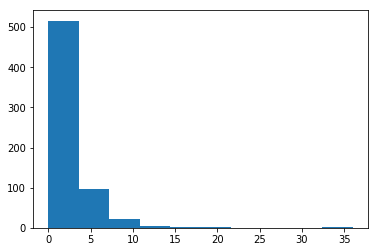

In [223]:
plt.hist(total_pass_lesson)

(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

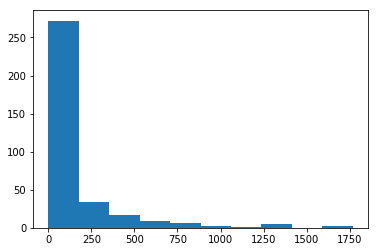

In [224]:
plt.hist(total_non_pass_min)

(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

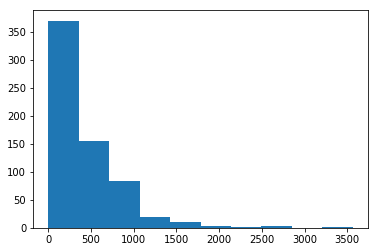

In [225]:
plt.hist(total_pass_min)